In [1]:
%load_ext autoreload
%autoreload 2

import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import IamDataset
from text_recognizer.datasets import IamParagraphsDataset
from text_recognizer.models import LineDetectorModel
from text_recognizer import util

In [2]:
paragraphs_dataset = IamParagraphsDataset()
paragraphs_dataset.load_or_generate_data()
print(paragraphs_dataset)

Loading IAM paragraph crops and ground truth from image files...
IAM Paragraphs Dataset
Num classes: 3
Train: (1229, 256, 256) (1229, 256, 256, 3)
Test: (308, 256, 256) (308, 256, 256, 3)



In [3]:
line_detector_model = LineDetectorModel()
line_detector_model.load_weights()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None)] 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 1 800         lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 1 12560       conv2d[0][0]                     
______________________________________________________________________________________________

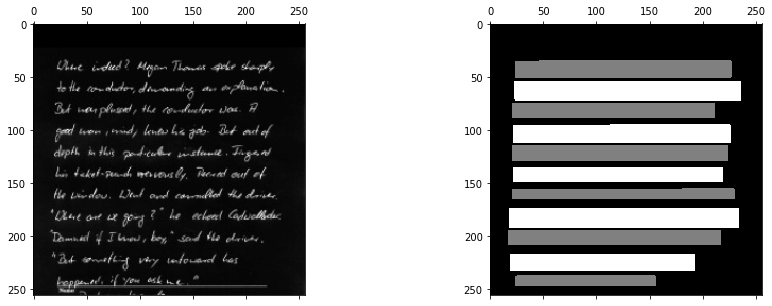

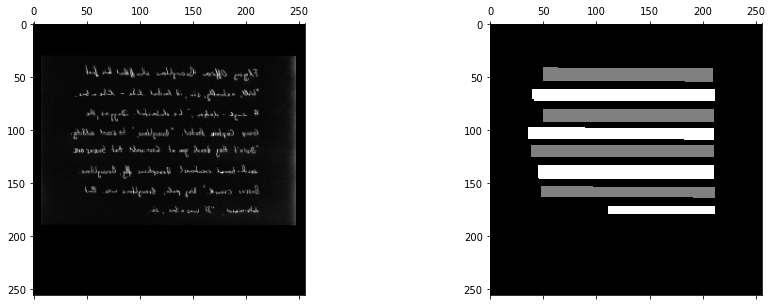

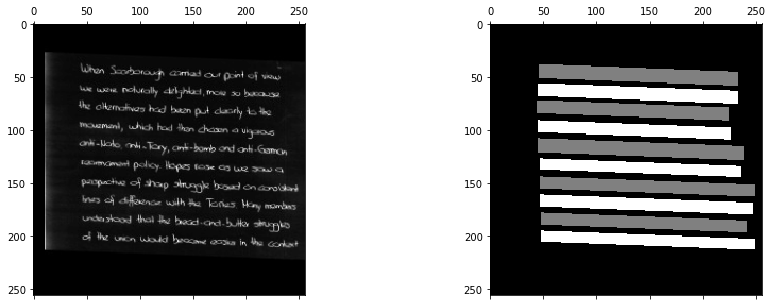

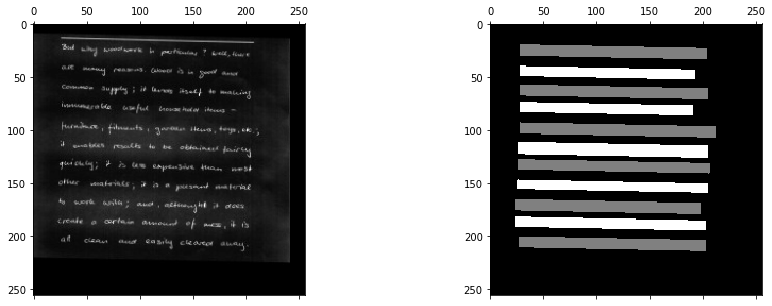

In [5]:
# Let's look at the training data augmentations

x_batch, y_batch = paragraphs_dataset.x_train[:4], paragraphs_dataset.y_train[:4]
x_batch_aug, y_batch_aug = line_detector_model.augment_batch(x_batch, y_batch)

for ind in range(x_batch_aug.shape[0]):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121)
    ax1.matshow(x_batch_aug[ind], cmap='gray')
    ax2 = fig.add_subplot(122)
    ax2.matshow(y_batch_aug[ind].argmax(-1), cmap='gray')

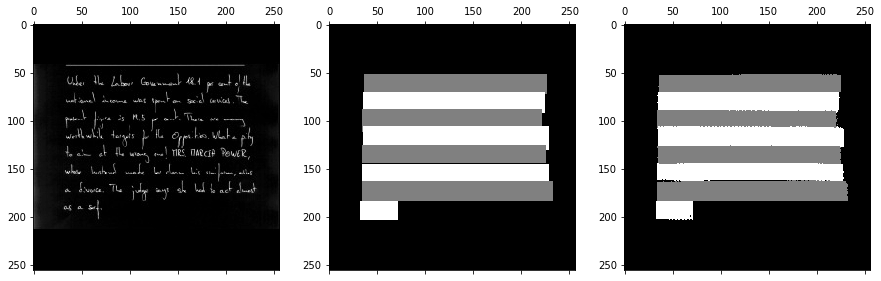

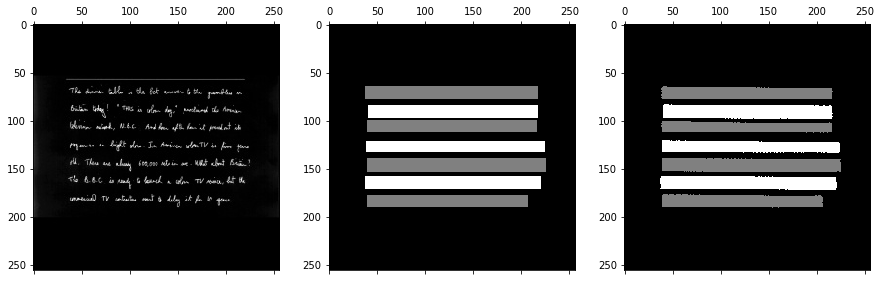

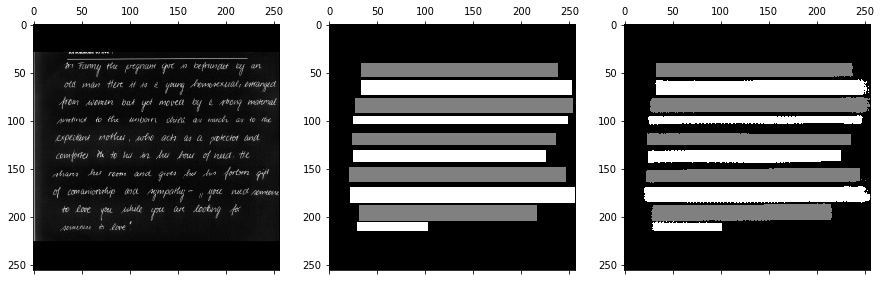

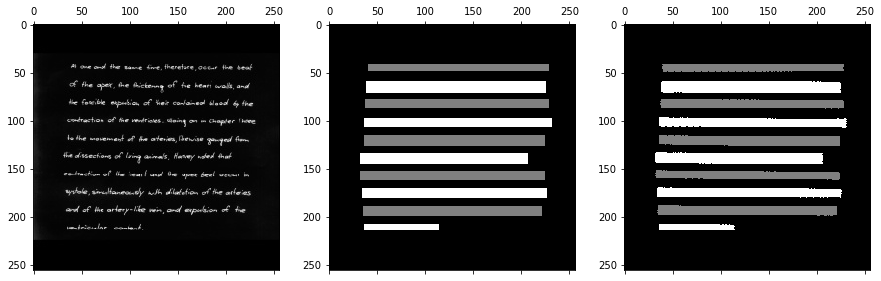

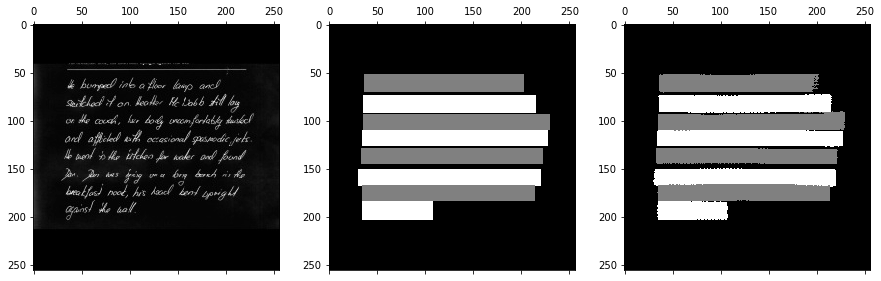

In [4]:
# Let's look at some test images, ground truth, and predictions

for ind in range(5):
    image = paragraphs_dataset.x_test[ind]
    gt = paragraphs_dataset.y_test[ind].argmax(-1)
    pred = line_detector_model.predict_on_image(image).argmax(-1)

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.matshow(image, cmap='gray')
    ax2 = fig.add_subplot(132)
    ax2.matshow(gt, cmap='gray')
    ax3 = fig.add_subplot(133)
    ax3.matshow(pred, cmap='gray')